In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
large = screen_funds('Equities', 'Domestic', 'Large-Cap')
mid = screen_funds('Equities', 'Domestic', 'Mid-Cap')
small = screen_funds('Equities', 'Domestic', 'Small-Cap')
print(len(large), len(mid), len(small))
quote = Quote(large + mid + small, 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

80 20 21
from 2019-04-26 to 2019-07-10 - 121


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

95


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
USMV,47,0.657743,1.501097,0.411739,6.574887,2.180427
SPLV,47,0.621938,1.528687,0.380886,6.258836,2.660443
MTUM,47,0.723657,1.857397,0.368243,7.129215,2.859384
PDP,47,0.598884,2.122038,0.263521,5.360019,3.974186
VIG,47,0.437932,1.764822,0.225660,4.005869,4.634193
FPX,47,0.500465,2.131626,0.216165,5.494379,5.445800
FVD,47,0.360118,1.510815,0.212094,3.303807,3.793309
FTCS,47,0.393862,1.860467,0.190371,3.358376,5.011633
ADX,47,0.372634,1.816888,0.183253,4.243733,5.318352


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted USA 0.869 0.787
evicted XSLV 0.739 0.687
retry backlogs ['SPHD', 'SPYV', 'SUSA', 'IWV', 'SPYG', 'VTI', 'HDV', 'PRF', 'QDF', 'IWB', 'IVE', 'FEX', 'SCHX', 'IWP', 'VONE', 'VUG', 'VO', 'VXF', 'IWF', 'MGC', 'SCHG', 'ITOT', 'DGRW', 'VONG', 'MOAT', 'SDY', 'RPG', 'IVW', 'VTV', 'MGK', 'SPTM', 'GSLC', 'VIG', 'VONV', 'MGV', 'SCHM', 'SPLG', 'IUSG', 'SCHV', 'VYM', 'OEF', 'VV', 'IUSV', 'DLN', 'SCHB', 'IWR', 'QUAL', 'RSP', 'IVV', 'VOO', 'VOE', 'QQQ', 'VOOG', 'SPY', 'SPHQ', 'IJK', 'VB', 'PKW', 'IWD', 'IYY', 'DGRO', 'JHMM', 'FV', 'IWY', 'XMLV', 'LRGF', 'DSI', 'SPLV', 'IWS', 'DVY', 'FVD', 'DIA', 'SCHD', 'SPYD', 'DON', 'MDYG', 'FNDX', 'VOT', 'FTCS', 'TILT', 'NOBL', 'PDP', 'FDL', 'FPX', 'PWV', 'SDOG', 'ONEQ', 'VBK', 'JKE', 'ADX', 'VLUE', 'MTUM'] at 0.905/-0.51 - 0.412
evicted VBK 0.904 0.769
evicted VLUE 0.885 0.718
evicted FDL 0.860 0.854
retry backlogs ['SPHD', 'SPYV', 'IWV', 'SUSA', 'SPYG', 'VTI', 'IVE', 'SCHG', 'VO', 'SDY', 'DGRW', 'PKW', 'IJK', 'VB', 'DSI', 'PRF', 'IWP', 'SCHX', 'IWB', 'IUSV'

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
USMV,47.0,0.657743,1.501097,-1.764315,-0.507887,0.470984,1.538688,4.297077,0.411739,6.574887,2.180427
Portfolio,47.0,0.657743,1.501097,-1.764315,-0.507887,0.470984,1.538688,4.297077,0.411739,6.574887,2.180427


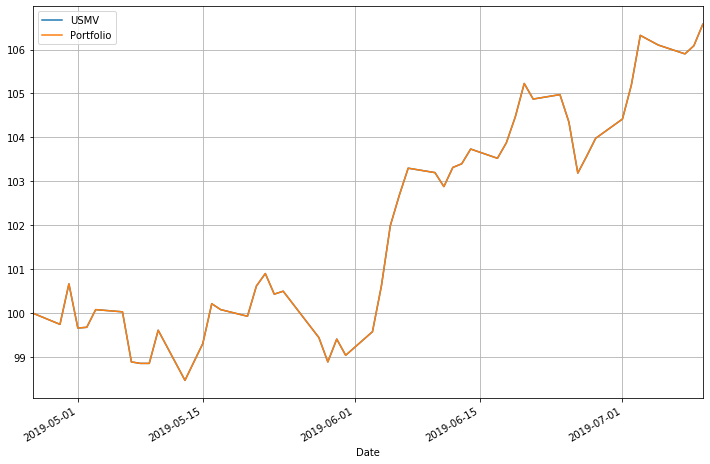

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1)
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)